# Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
import string
print("Done")

Done


# Preparation 

In [2]:
x = input('Input number from 0-6: ',)
data_list = ["homedepot.com_204074796.csv", "homedepot.com_319247071.csv", "lowes.com_3286026.csv",
             "lowes.com_3380314.csv", "lowes.com_50280511.csv", "lowes.com_1003066162.csv", "lowes.com_5000026209.csv",
            "lowes.com_5001899855.csv"]

# read in data
print('Current file: ',data_list[int(x)])
df = pd.read_csv(data_list[int(x)])
df.head()

Input number from 0-6: 0
Current file:  homedepot.com_204074796.csv


,Market_place,URL,Product_name,SKU,Price,Currency,Subject,Author,Date,Review,Stars
0,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Tiny pool of water in the bowl.,GreatAim,"Nov 22, 2022",I purchased 4 of these toilets for my new hous...,1
1,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Cheap seat and lid,Dee2,"Sep 26, 2022","I recently bought the chair height, elongated ...",2
2,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Nice color and sits at a great height for gett...,HomeDepotCustomer,"Jun 15, 2022",Nice color and sits at a great height for gett...,4
3,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Great Value / Nice Product,DENISE,"Feb 8, 2022",This toilet is a great value and looks and per...,5
4,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Good value toilet,Tom_P,"Dec 25, 2021",Looks good - Easy install with no issues. The ...,4


Stars Counts

Text(0.5, 0, 'Review Stars')

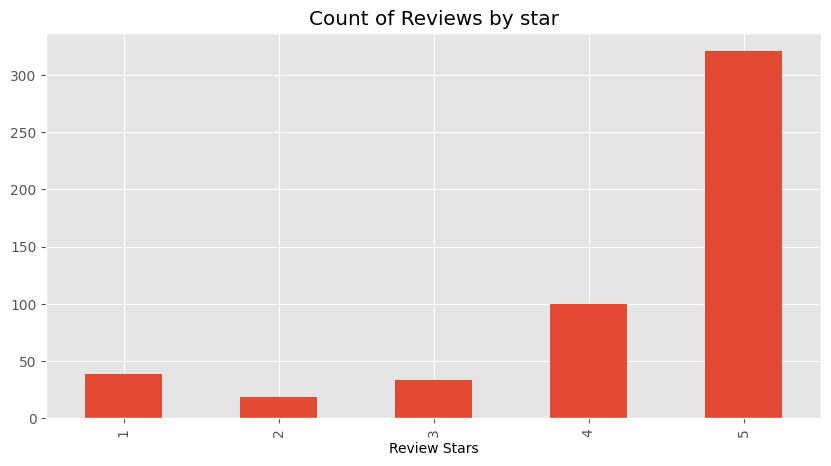

In [3]:
ax = df['Stars'].value_counts().sort_index()\
    .plot(kind= 'bar',
          title = 'Count of Reviews by star',
         figsize = (10,5))
ax.set_xlabel('Review Stars')

# Data

In [4]:
reviews = df['Review']
reviews = pd.DataFrame(reviews)
reviews['Subject'] = df['Subject']
reviews['Stars'] = df['Stars']
reviews.dropna(inplace= True)
reviews.index = np.arange(0,len(reviews))
reviews['ID'] = np.arange(1,len(reviews)+1)
reviews.tail()

,Review,Subject,Stars,ID
319,Comes with almost everything. Missing the fres...,Get what you pay,4,320
320,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,321
321,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,322
322,Bottom lid for the guys will not remain up,Lid doesn't work correctly,3,323
323,"Good inexpensive toiled, Installed easily and ...","Good inexpensive toiled, Installed easily and ...",4,324


In [5]:
good = df[df["Stars"] >= 4]

bad = df[df["Stars"] <= 3]

In [6]:
good_reviews = good['Review']
good_reviews = pd.DataFrame(good_reviews)
good_reviews['Subject'] = good['Subject']
good_reviews['Stars'] = good['Stars']
good_reviews.dropna(inplace= True)
good_reviews.index = np.arange(0,len(good_reviews))
good_reviews['ID'] = np.arange(1,len(good_reviews)+1)
good_reviews

,Review,Subject,Stars,ID
0,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4,1
1,This toilet is a great value and looks and per...,Great Value / Nice Product,5,2
2,Looks good - Easy install with no issues. The ...,Good value toilet,4,3
3,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4,4
4,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4,5
...,...,...,...,...
240,"Easy to install, and leak free. Once in use, t...","Easy to install, and leak free. Once in use,...",4,241
241,It was easy to install. Works great. Thanks.,It was easy to install. Works great. Thanks....,5,242
242,Comes with almost everything. Missing the fres...,Get what you pay,4,243
243,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,244


In [7]:
bad_reviews = bad['Review']
bad_reviews = pd.DataFrame(bad_reviews)
bad_reviews['Subject'] = bad['Subject']
bad_reviews['Stars'] = bad['Stars']
bad_reviews.dropna(inplace= True)
bad_reviews.index = np.arange(0,len(bad_reviews))
bad_reviews['ID'] = np.arange(1,len(bad_reviews)+1)
bad_reviews

,Review,Subject,Stars,ID
0,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1,1
1,"I recently bought the chair height, elongated ...",Cheap seat and lid,2,2
2,Terrible product. Bowl won't stay full and the...,The only thing efficient is the malfunctioning.,1,3
3,This toilet is way to high. The actual measure...,Terrible,1,4
4,The first thing I noticed were several holes i...,"Holes in Bowl, Seat wont stay up",1,5
...,...,...,...,...
74,water will not stay in the bowl you have to fl...,water will not stay in the bowl you have to...,1,75
75,"After a bowel movement , the bowl will not tak...","After a bowel movement , the bowl will not tak...",2,76
76,I had American Standard toilet in my house for...,Worst toilet ever,1,77
77,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,78


# VADER Seniment Scoring

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [9]:
res = {}
for i, row in tqdm(reviews.iterrows(), total = len(reviews)):
    review = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review)
    


  0%|          | 0/324 [00:00<?, ?it/s]

In [10]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(reviews, how= 'left')
vaders.head()

,ID,neg,neu,pos,compound,Review,Subject,Stars
0,1,0.052,0.864,0.084,0.2631,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1
1,2,0.086,0.914,0.000,-0.8012,"I recently bought the chair height, elongated ...",Cheap seat and lid,2
2,3,0.090,0.705,0.205,0.7584,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4
3,4,0.000,0.427,0.573,0.9442,This toilet is a great value and looks and per...,Great Value / Nice Product,5
4,5,0.070,0.811,0.119,0.3071,Looks good - Easy install with no issues. The ...,Good value toilet,4


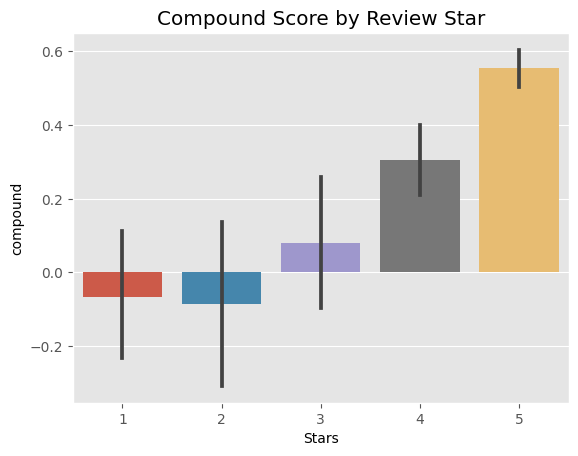

In [11]:
ax = sns.barplot(data= vaders, x = 'Stars', y= 'compound')
ax.set_title('Compound Score by Review Star')
plt.show()

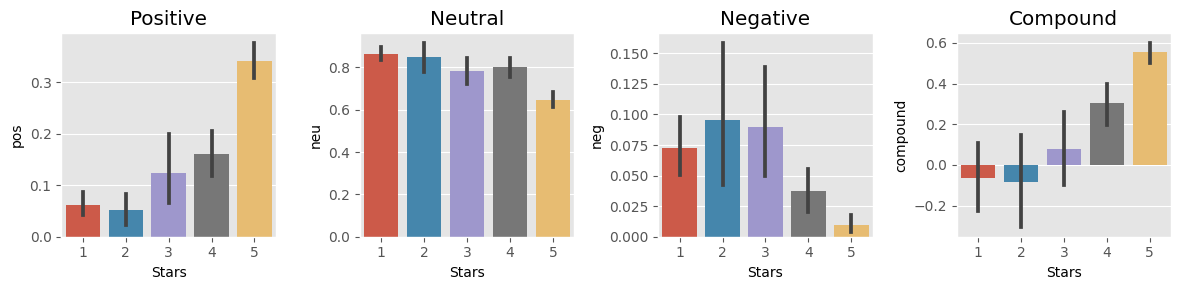

In [12]:
fig, axs = plt.subplots(1,4, figsize = (12,3))
sns.barplot(data= vaders, x= 'Stars', y= 'pos', ax = axs[0])
sns.barplot(data= vaders, x= 'Stars', y= 'neu', ax = axs[1])
sns.barplot(data= vaders, x= 'Stars', y= 'neg', ax = axs[2])
sns.barplot(data= vaders, x = 'Stars', y= 'compound', ax = axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

<font color='blue'>Tokenize senteces (Not finish yet)

In [ ]:
tokenized_sentence_list = []
for i in reviews['Review']:
    sentence = sent_tokenize(i)
    tokenized_sentence_list.append(sentence)
reviews['Tokenized Review'] = tokenized_sentence_list
reviews['Tokenized Review']

<font color ='blue'> Find the words

<font color = 'red'>Good review

In [17]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
ps = PorterStemmer()
good_tokenized_sentence_list = []
for i in good_reviews['Review']:
    i = i.lower()
    i = re.sub("[^0-9A-Za-z]"," ",i)
    i = re.sub(r'\w*\d+\w*','',i)
    words = word_tokenize(i)
    words_new = [j for j in words if j not in stopwords]
    w = [ps.stem(words) for words in words_new]
    good_tokenized_sentence_list.append(w)

good_reviews['Tokenized Review'] = good_tokenized_sentence_list
good_reviews

,Review,Subject,Stars,ID,Tokenized Review
0,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4,1,"[nice, color, sit, great, height, get, happi, ..."
1,This toilet is a great value and looks and per...,Great Value / Nice Product,5,2,"[toilet, great, valu, look, perform, perfectli..."
2,Looks good - Easy install with no issues. The ...,Good value toilet,4,3,"[look, good, easi, instal, issu, includ, wax, ..."
3,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4,4,"[rate, provid, verifi, purchas]"
4,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4,5,"[eleg, appear, comfort, littl, darker, expect,..."
...,...,...,...,...,...
240,"Easy to install, and leak free. Once in use, t...","Easy to install, and leak free. Once in use,...",4,241,"[easi, instal, leak, free, use, toilet, flush,..."
241,It was easy to install. Works great. Thanks.,It was easy to install. Works great. Thanks....,5,242,"[easi, instal, work, great, thank]"
242,Comes with almost everything. Missing the fres...,Get what you pay,4,243,"[come, almost, everyth, miss, fresh, water, ho..."
243,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,244,"[fit, perfectli, includ, wax, ring, bolt]"


In [18]:
good_pos_word_list = []
good_neu_word_list = []
good_neg_word_list = []

for i in good_reviews['Tokenized Review']:
    for word in i:
        if (sia.polarity_scores(word)['compound'] >= 0.1):
            good_pos_word_list.append(word)
        elif (sia.polarity_scores(word)['compound'] <= -0.1):
            good_neg_word_list.append(word)
        else:
            good_neu_word_list.append(word)


<font color = 'green'> Positive words

In [20]:
x = np.array(good_pos_word_list)
pos_key_words = pd.DataFrame({'Positive word': np.unique(x)})
pos_key_words

,Positive word
0,accept
1,allow
2,attract
3,best
4,better
5,care
6,charm
7,clean
8,clear
9,comfort


<font color = 'green'> Neurtal words

In [21]:
y = np.array(good_neu_word_list)
neu_key_words = pd.DataFrame({'Neurtal word': np.unique(y)})
neu_key_words

,Neurtal word
0,abk
1,abl
2,actual
3,ada
4,add
...,...
602,would
603,year
604,yesterday
605,yet


<font color='green'>Negative word

In [22]:
z = np.array(good_neg_word_list)
neg_key_words = pd.DataFrame({'Negative word': np.unique(z)})
neg_key_words

,Negative word
0,anti
1,bad
2,complaint
3,crap
4,cut
5,defect
6,delay
7,difficult
8,disappoint
9,forget


<font color='red'>Bad review

In [23]:

bad_tokenized_sentence_list = []
for i in bad_reviews['Review']:
    i = i.lower()
    i = re.sub("[^0-9A-Za-z]"," ",i)
    i = re.sub(r'\w*\d+\w*','',i)
    words = word_tokenize(i)
    words_new = [j for j in words if j not in stopwords]
    w = [ps.stem(words) for words in words_new]
    bad_tokenized_sentence_list.append(w)

bad_reviews['Tokenized Review'] = bad_tokenized_sentence_list
bad_reviews

,Review,Subject,Stars,ID,Tokenized Review
0,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1,1,"[purchas, toilet, new, hous, pool, water, bowl..."
1,"I recently bought the chair height, elongated ...",Cheap seat and lid,2,2,"[recent, bought, chair, height, elong, toilet,..."
2,Terrible product. Bowl won't stay full and the...,The only thing efficient is the malfunctioning.,1,3,"[terribl, product, bowl, stay, full, flush, po..."
3,This toilet is way to high. The actual measure...,Terrible,1,4,"[toilet, way, high, actual, measur, match, box..."
4,The first thing I noticed were several holes i...,"Holes in Bowl, Seat wont stay up",1,5,"[first, thing, notic, sever, hole, porcelain, ..."
...,...,...,...,...,...
74,water will not stay in the bowl you have to fl...,water will not stay in the bowl you have to...,1,75,"[water, stay, bowl, flush, go, plumber, take, ..."
75,"After a bowel movement , the bowl will not tak...","After a bowel movement , the bowl will not tak...",2,76,"[bowel, movement, bowl, take, everyth, away, m..."
76,I had American Standard toilet in my house for...,Worst toilet ever,1,77,"[american, standard, toilet, hous, year, one, ..."
77,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,78,"[power, flush, low, water, sorri, got, one, we..."


In [24]:
bad_pos_word_list = []
bad_neu_word_list = []
bad_neg_word_list = []

for i in bad_reviews['Tokenized Review']:
    for word in i:
        if (sia.polarity_scores(word)['compound'] >= 0.1):
            bad_pos_word_list.append(word)
        elif (sia.polarity_scores(word)['compound'] <= -0.1):
            bad_neg_word_list.append(word)
        else:
            bad_neu_word_list.append(word)


<font color = 'green'> Positive words

In [25]:
x = np.array(bad_pos_word_list)
pos_key_words = pd.DataFrame({'Positive word': np.unique(x)})
pos_key_words

,Positive word
0,accept
1,best
2,better
3,bold
4,certain
5,champ
6,cheer
7,clean
8,cleaner
9,clear


<font color='green'> Neurtal words

In [26]:
y = np.array(bad_neu_word_list)
neu_key_words = pd.DataFrame({'Neurtal word': np.unique(y)})
neu_key_words

,Neurtal word
0,abl
1,acknowledg
2,action
3,actual
4,ad
...,...
577,would
578,write
579,ye
580,year


<font color='green'>Negative word

In [27]:
z = np.array(bad_neg_word_list)
neg_key_words = pd.DataFrame({'Negative word': np.unique(z)})
neg_key_words

,Negative word
0,aggress
1,annoy
2,avoid
3,bad
4,broke
5,crap
6,cut
7,defect
8,difficult
9,disappoint


# Roberta Pretrained Model 

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
#import pytorch

In [13]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [15]:
# VADER results on example
example = reviews.Review[0]
print(example)
sia.polarity_scores(example)

I purchased 4 of these toilets for my new house. The pool of water in the bowl of 3 of them is very small, often resulting in solid waste being smeared well above the water line, where flushing will not easily remove it! One of the four toilets does have a "normal sized" pool of water. It is clear that it was not manufactured along with the other 3, it has different printing in the tank, despite having the same SKU number. I have included photos of both variations and their markings.


{'neg': 0.052, 'neu': 0.864, 'pos': 0.084, 'compound': 0.2631}

In [16]:
# Roberta results on example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.39873433, 'roberta_neu': 0.48008606, 'roberta_pos': 0.1211796}


In [17]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [18]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['Review']
        myid = row['ID']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/324 [00:00<?, ?it/s]

In [19]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
#results_df = results_df.merge(df, how='left',left_on=None, right_on=None, left_index=False, right_index=False)
results_df['Review'] = reviews['Review']
results_df['Stars'] = reviews['Stars']
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,Review,Stars
0,1,0.398734,0.480086,0.121180,I purchased 4 of these toilets for my new hous...,1
1,2,0.956776,0.038268,0.004956,"I recently bought the chair height, elongated ...",2
2,3,0.048323,0.153989,0.797688,Nice color and sits at a great height for gett...,4
3,4,0.002067,0.016569,0.981364,This toilet is a great value and looks and per...,5
4,5,0.011331,0.081121,0.907548,Looks good - Easy install with no issues. The ...,4
...,...,...,...,...,...,...
319,320,0.549718,0.398696,0.051586,Comes with almost everything. Missing the fres...,4
320,321,0.667670,0.301161,0.031169,No power to the flush very low water sorry I g...,2
321,322,0.005204,0.250874,0.743922,Fit perfectly. Includes wax ring and bolts,5
322,323,0.527276,0.452169,0.020555,Bottom lid for the guys will not remain up,3


In [20]:
# Positive review with 1 star
results_df.query('Stars == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'Defective water supply unit had company send out new water supply control. Works ok now'

In [21]:
# Negative review with 5 star
results_df.query('Stars == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

'my black toilet is up stairs but the tiles still needs to be repair and were still finishing up our black bathrooms but it has to take a while to get them done we just got our black toilets like the past year'

In [73]:
# Add labels based on the highest scores
label = []
for i in results_df.index:
    neg_i = results_df.roberta_neg[i] 
    neu_i = results_df.roberta_neu[i]
    pos_i = results_df.roberta_pos[i] 
    if (neg_i > neu_i) & (neg_i > pos_i):
        label.append('Negative')
    elif (pos_i > neu_i) & (pos_i > neu_i):
        label.append('Positive')
    else:
        label.append('Neutral')
results_df['Label'] = label
results_df['Label'].level


,Id,roberta_neg,roberta_neu,roberta_pos,Review,Stars,Label
0,1,0.398734,0.480086,0.121180,I purchased 4 of these toilets for my new hous...,1,Neutral
1,2,0.956776,0.038268,0.004956,"I recently bought the chair height, elongated ...",2,Negative
2,3,0.048323,0.153989,0.797688,Nice color and sits at a great height for gett...,4,Positive
3,4,0.002067,0.016569,0.981364,This toilet is a great value and looks and per...,5,Positive
4,5,0.011331,0.081121,0.907548,Looks good - Easy install with no issues. The ...,4,Positive
...,...,...,...,...,...,...,...
319,320,0.549718,0.398696,0.051586,Comes with almost everything. Missing the fres...,4,Negative
320,321,0.667670,0.301161,0.031169,No power to the flush very low water sorry I g...,2,Negative
321,322,0.005204,0.250874,0.743922,Fit perfectly. Includes wax ring and bolts,5,Positive
322,323,0.527276,0.452169,0.020555,Bottom lid for the guys will not remain up,3,Negative


In [85]:
# Frequency of each label
neg = len(results_df[results_df.Label == 'Negative'])
pos = len(results_df[results_df.Label == 'Positive'])
neu = len(results_df[results_df.Label == 'Neutral'])
print('Frequency of Negative review: ', neg)
print('Frequency of Neutral review: ', neu)
print('Frequency of Positive review: ', pos)

Frequency of Negative review:  69
Frequency of Neutral review:  72
Frequency of Positive review:  183


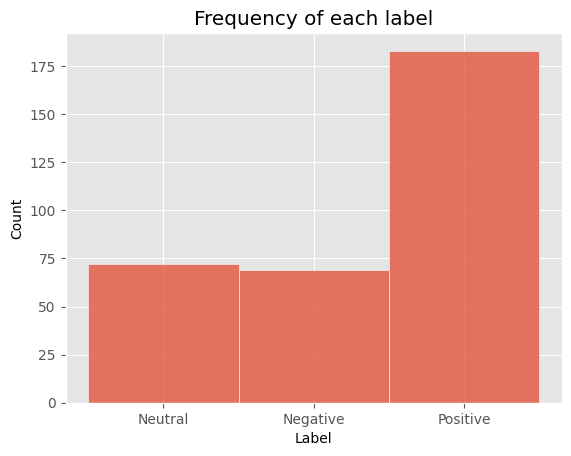

In [105]:
ax = sns.histplot(data=results_df, x="Label")
ax.set_title('Frequency of each label')
plt.show()

In [104]:
# Extract all neutral reviews
results_df[results_df.Label == 'Neutral'].sort_values('roberta_neg', ascending=False)#['Review'].values[1]

,Id,roberta_neg,roberta_neu,roberta_pos,Review,Stars,Label
110,111,0.454072,0.472878,0.073051,The toilet clogs very easily and then is diffi...,1,Neutral
166,167,0.422059,0.532751,0.045189,The installation was smooth but the floor bolt...,4,Neutral
92,93,0.419906,0.491117,0.088978,"The box has everything ready to assemble, the ...",4,Neutral
0,1,0.398734,0.480086,0.121180,I purchased 4 of these toilets for my new hous...,1,Neutral
80,81,0.389375,0.561996,0.048630,"Flushes ok, but does not hold very much water ...",3,Neutral
...,...,...,...,...,...,...,...
192,193,0.019547,0.792025,0.188428,Everything's included to complete the installa...,5,Neutral
149,150,0.016869,0.682721,0.300410,Flushes and fills quickly,5,Neutral
74,75,0.016120,0.508129,0.475750,Just what we needed for the extra bathroom in ...,4,Neutral
188,189,0.015001,0.816848,0.168151,Replaced three old original short commodes wit...,4,Neutral


<font color='blue'>Scores by review stars

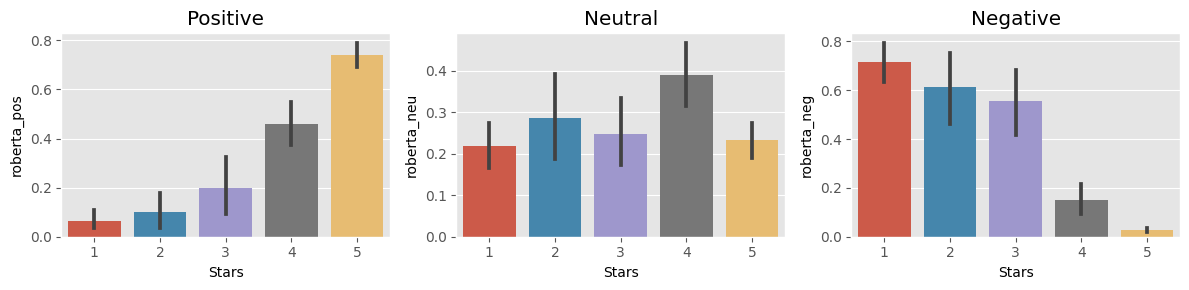

In [55]:
fig, axs = plt.subplots(1,3, figsize = (12,3))
sns.barplot(data= results_df, x= 'Stars', y= 'roberta_pos', ax = axs[0])
sns.barplot(data= results_df, x= 'Stars', y= 'roberta_neu', ax = axs[1])
sns.barplot(data= results_df, x= 'Stars', y= 'roberta_neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

# Bert Model

In [22]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
import torch

In [23]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [26]:
# Bert results on example
tokens = tokenizer.encode_plus(example, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
logits = model(tokens['input_ids'], attention_mask=tokens['attention_mask']).logits

probs = torch.nn.functional.softmax(logits, dim=-1)
pos_score = probs[0][1].item()
neg_score = probs[0][0].item()

# Print the scores
print(f"Positive score: {pos_score:.2f}")
print(f"Negative score: {neg_score:.2f}")

Positive score: 0.36
Negative score: 0.64


In [27]:
def get_review_scores(review):
    # Tokenize the review
    tokens = tokenizer.encode_plus(review, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')

    # Feed the tokens into the model to obtain logits
    logits = model(tokens['input_ids'], attention_mask=tokens['attention_mask']).logits

    # Convert logits to probabilities using softmax
    probs = torch.nn.functional.softmax(logits, dim=-1)

    # Extract the positive and negative scores
    pos_score = probs[0][1].item()
    neg_score = probs[0][0].item()

    return pos_score, neg_score

In [28]:
example_list = reviews.Review[0:10]
example_list

0    I purchased 4 of these toilets for my new hous...
1    I recently bought the chair height, elongated ...
2    Nice color and sits at a great height for gett...
3    This toilet is a great value and looks and per...
4    Looks good - Easy install with no issues. The ...
5    Terrible product. Bowl won't stay full and the...
6              Rating provided by a verified purchaser
7    Very elegant in appearance and it is very comf...
8    This toilet is way to high. The actual measure...
9    The first thing I noticed were several holes i...
Name: Review, dtype: object

In [29]:
# Bert results on 10 reviews
pos_scores = []
neg_scores = []
for review in tqdm(example_list):
    pos_score, neg_score = get_review_scores(review)
    pos_scores.append(pos_score)
    neg_scores.append(neg_score)
# 8 mins for passing 10 reviews
# 4 hours for passing all reviews

  0%|          | 0/10 [00:00<?, ?it/s]

In [32]:
bert_result = pd.DataFrame({'Review': reviews.Review[0:10],
                             'Stars': reviews.Stars[0:10],
                            'Postive scores': pos_scores,
                            'Negative scores': neg_scores})
bert_result

,Review,Stars,Postive scores,Negative scores
0,I purchased 4 of these toilets for my new hous...,1,0.360479,0.639521
1,"I recently bought the chair height, elongated ...",2,0.372411,0.627589
2,Nice color and sits at a great height for gett...,4,0.365079,0.634921
3,This toilet is a great value and looks and per...,5,0.355914,0.644086
4,Looks good - Easy install with no issues. The ...,4,0.389397,0.610603
5,Terrible product. Bowl won't stay full and the...,1,0.366382,0.633618
6,Rating provided by a verified purchaser,4,0.435660,0.564340
7,Very elegant in appearance and it is very comf...,4,0.368089,0.631911
8,This toilet is way to high. The actual measure...,1,0.377718,0.622282
9,The first thing I noticed were several holes i...,1,0.374583,0.625417


# Textblob

In [112]:
from textblob import TextBlob

textblob_polarity = []
textblob_subjectivity = []


for review in reviews['Review']:
    blob = TextBlob(review)
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity
    textblob_polarity.append(polarity_score),
    textblob_subjectivity.append(subjectivity_score)


In [113]:
textblob_df = pd.DataFrame({'Review': reviews['Review'],
                            'Stars': reviews['Stars'],
                            'Polarity Score': textblob_polarity,
                            'Subjectivity Score': textblob_subjectivity})
textblob_df

,Review,Stars,Polarity Score,Subjectivity Score
0,I purchased 4 of these toilets for my new hous...,1,-0.048588,0.376474
1,"I recently bought the chair height, elongated ...",2,-0.078333,0.404000
2,Nice color and sits at a great height for gett...,4,0.292063,0.705556
3,This toilet is a great value and looks and per...,5,0.345333,0.524667
4,Looks good - Easy install with no issues. The ...,4,0.223194,0.556667
...,...,...,...,...
319,Comes with almost everything. Missing the fres...,4,0.033333,0.216667
320,No power to the flush very low water sorry I g...,2,-0.283333,0.663333
321,Fit perfectly. Includes wax ring and bolts,5,0.700000,0.700000
322,Bottom lid for the guys will not remain up,3,0.000000,0.000000


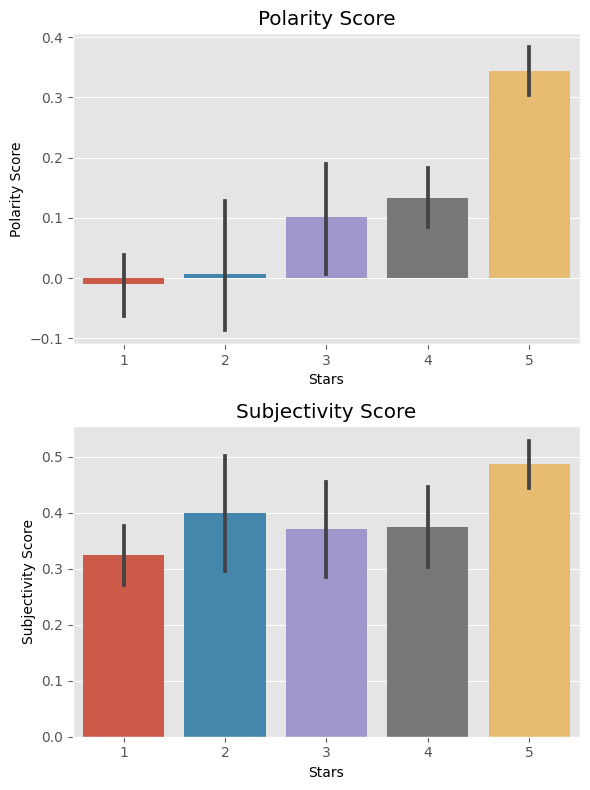

In [119]:
fig, axs = plt.subplots(2,1, figsize = (6,8))
sns.barplot(data= textblob_df, x = 'Stars', y= 'Polarity Score', ax = axs[0])
sns.barplot(data= textblob_df, x = 'Stars', y= 'Subjectivity Score', ax = axs[1])
axs[0].set_title('Polarity Score')
axs[1].set_title('Subjectivity Score')


plt.tight_layout()
plt.show()